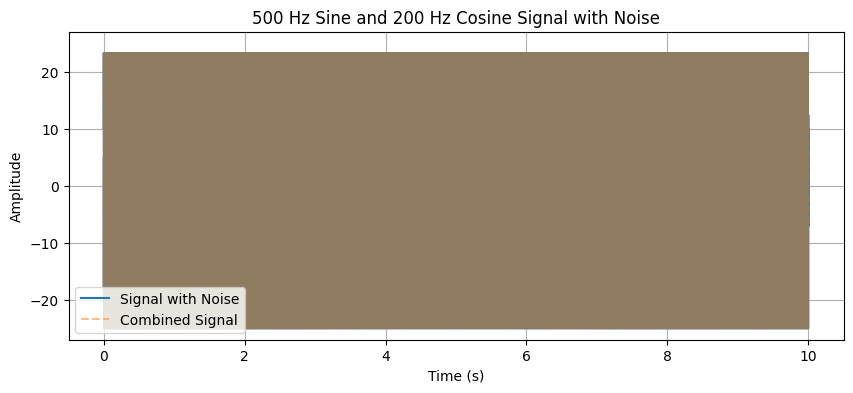

RMS for buffer 1: 12.75
RMS for buffer 2: 12.75
RMS for buffer 3: 12.75
RMS for buffer 4: 12.75
RMS for buffer 5: 12.75
RMS for buffer 6: 12.75
RMS for buffer 7: 12.75
RMS for buffer 8: 12.75
RMS for buffer 9: 12.75
RMS for buffer 10: 12.75


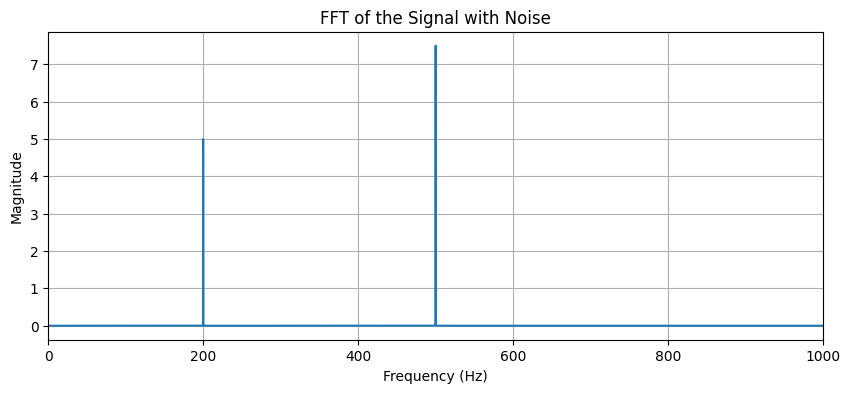

In [17]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters
duration = 10  # seconds
frequency_sine = 500  # Hz
amplitude_sine = 15  # amplitude of the sine wave
frequency_cosine = 200  # Hz
amplitude_cosine = 10  # amplitude of the cosine wave
noise_level = 2  # amplitude of the noise

# Time array
t = np.linspace(0, duration, int(duration * frequency_sine * 100))  # Increased sample rate for smoother signal

# Generate pure sinusoidal signal
signal_sine = amplitude_sine * np.sin(2 * np.pi * frequency_sine * t)

# Generate pure cosine signal
signal_cosine = amplitude_cosine * np.cos(2 * np.pi * frequency_cosine * t)

# Add random noise
noise = noise_level * np.random.normal(size=t.shape)  # Generate random noise
signal_with_noise = signal_sine + signal_cosine  # Add noise to the combined signal

# Plotting the signal with noise
plt.figure(figsize=(10, 4))
plt.plot(t, signal_with_noise, label='Signal with Noise')
plt.plot(t, signal_sine + signal_cosine, label='Combined Signal', linestyle='--', alpha=0.5)  # Optional: plot the combined signal for comparison
plt.title('500 Hz Sine and 200 Hz Cosine Signal with Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-amplitude_sine - amplitude_cosine - noise_level, amplitude_sine + amplitude_cosine + noise_level)  # Adjust y-limits to accommodate noise
plt.grid()
plt.legend()
plt.show()

# Calculate RMS for each 1-second buffer
buffer_size = int(len(signal_with_noise) / 10)  # 1 second buffer size (100 samples per second)
num_buffers = len(signal_with_noise) // buffer_size
rms_values = []

for i in range(num_buffers):
    buffer = signal_with_noise[i * buffer_size:(i + 1) * buffer_size]
    rms = np.sqrt(np.mean(buffer**2))  # Calculate RMS
    rms_values.append(rms)

# Print RMS values for each buffer
for i, rms in enumerate(rms_values):
    print(f'RMS for buffer {i + 1}: {rms:.2f}')

# FFT calculation
fft_result = np.fft.fft(signal_with_noise)
frequencies = np.fft.fftfreq(len(fft_result), d=t[1] - t[0])  # Frequency bins

# Normalize the FFT result
fft_magnitude = np.abs(fft_result) / len(signal_with_noise)  # Normalize by the number of samples

# Plotting the FFT
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], fft_magnitude[:len(fft_result)//2])  # Plot only the positive frequencies
plt.title('FFT of the Signal with Noise')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.xlim(0, 1000)  # Limit x-axis for better visibility
plt.show()


